In [51]:
# Imports

import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from plotly import __version__
from plotly.offline import iplot
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
from nltk import word_tokenize
nltk.download('punkt')
from nltk import punkt

from nlppreprocess import NLP

[nltk_data] Downloading package stopwords to C:\Users\Shayaan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shayaan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
# Importing the dataset

twt = pd.read_csv('covid19_tweets.csv')

Dataset Exploration and visualization


In [53]:
# A look at a fraction of the dataset
twt.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [54]:
# Shape of the dataset

twt.shape

(179108, 13)

In [55]:
# Information about the dataset

twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


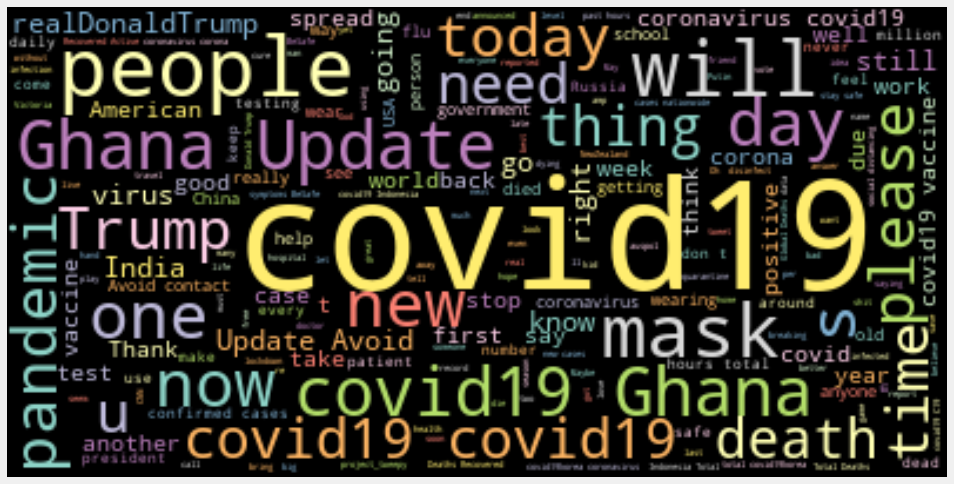

In [56]:
# Wordcloud for the text in the tweets after preprocessing

text = ",".join(review for review in twt.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=1000, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [57]:
# Dataset description

twt.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [58]:
# Missing values in the form of percentages

for var in twt.columns:
    if twt[var].isna().sum() > 0:
        miss = np.round(twt[var].isna().sum() / twt.shape[0] * 100 , 3)
        print(var, "has {0} % of missing values".format(miss))

user_location has 20.53 % of missing values
user_description has 5.743 % of missing values
hashtags has 28.661 % of missing values
source has 0.043 % of missing values


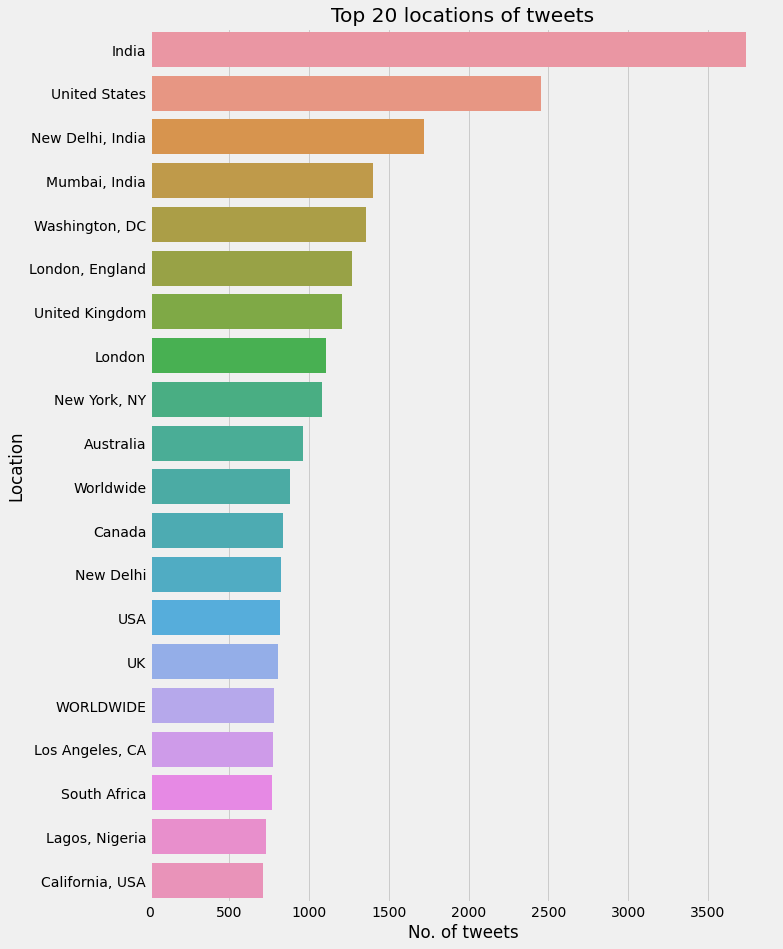

In [59]:
# Plotting the location of tweets in the form of a Bargraph

plt.figure(figsize=(10,15))
sns.barplot(twt["user_location"].value_counts().values[0:20] , twt["user_location"].value_counts().index[0:20])
plt.title("Top 20 locations of tweets")
plt.xlabel("No. of tweets")
plt.ylabel("Location")
plt.show()

In [60]:
# Only certain columns are needed for the project

req_cols = ['user_name' , 'user_location' , 'date' , 'text']
twt = twt[req_cols]
twt.head()

,user_name,user_location,date,text
0,ᏉᎥ☻լꂅϮ,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [61]:
# NLP from nlppreprocess is used to preprocess the tweets. It removes URLs, punctuations, numbers, hashtags as well as lowercases
# all of the text. This function is used instead of defining a function from scratch as it optimizes the size of the code as well as 
# improves performance

nlp = NLP()
twt['text'] = twt['text'].apply(nlp.process)

In [62]:
twt.head()

,user_name,user_location,date,text
0,ᏉᎥ☻լꂅϮ,astroworld,2020-07-25 12:27:21,smelled scent hand sanitizers today someone in...
1,Tom Basile 🇺🇸,"New York, NY",2020-07-25 12:27:17,Hey Yankees YankeesPR and MLB wouldn t ma...
2,Time4fisticuffs,"Pewee Valley, KY",2020-07-25 12:27:14,diane wdunlap realDonaldTrump Trump never o...
3,ethel mertz,Stuck in the Middle,2020-07-25 12:27:10,brookbanktv one gift COVID give appreciation...
4,DIPR-J&K,Jammu and Kashmir,2020-07-25 12:27:08,July Media Bulletin Novel CoronaVirusUpdat...
